# Synopsis

# Configuration

In [3]:
db_file = 'novels.db'

# Libraries

In [13]:
import sqlite3
import pandas as pd
import numpy as np

from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Pragmas

In [14]:
%matplotlib inline

# Process

## Import data

In [46]:
with sqlite3.connect(db_file) as db:
    bags = pd.read_sql("SELECT * FROM bag", db, index_col='bag_id')
    tfidf = pd.read_sql("SELECT * FROM tfidf_small", db, index_col=['bag_id','term_id'])    
    vocab = pd.read_sql("select * from vocab", db, index_col='term_id')

## Unpack TFIDF

In [16]:
TFIDF = tfidf.unstack()
TFIDF.columns = TFIDF.columns.droplevel(0)
vocab_idx = TFIDF.columns

## Run PCA

In [17]:
pca = PCA(n_components=10)
projected = pca.fit_transform(normalize(TFIDF.values, norm='l2'))

## Plot results

In [38]:
genres = bags.genre
letters = genres.unique().tolist()
genre_ids = genres.apply(lambda x: letters.index(x)).values

### PC1 vs PC2

Text(0, 0.5, 'PC2')

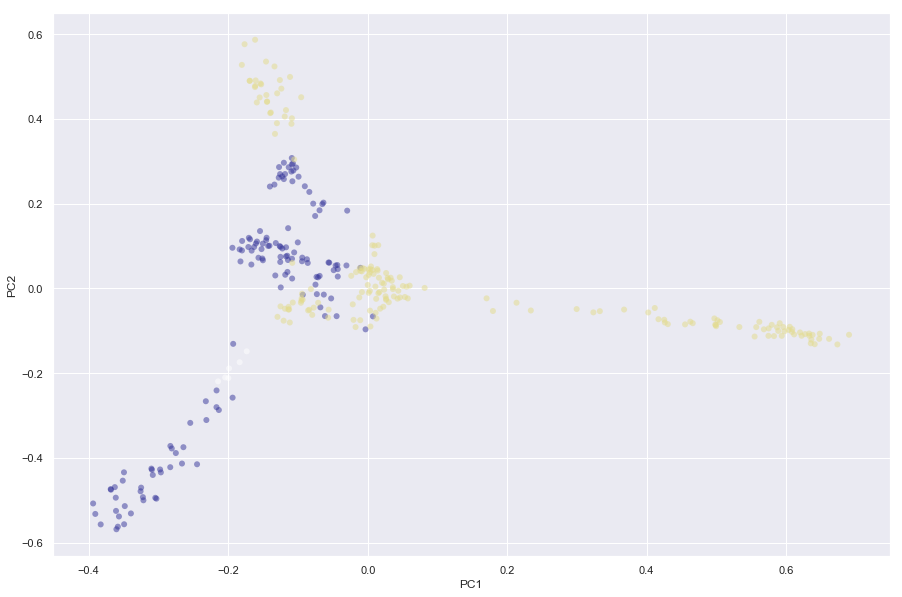

In [39]:
plt.figure(figsize=(15,10))
plt.scatter(projected[:, 0], 
            projected[:, 1],
            c=genre_ids, 
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('terrain', 10))
plt.xlabel('PC1')
plt.ylabel('PC2')

# for i, x in enumerate(projected):
#     plt.annotate(i+1, (x[1], x[2]))

### PC2 and PC3

Text(0, 0.5, 'PC3')

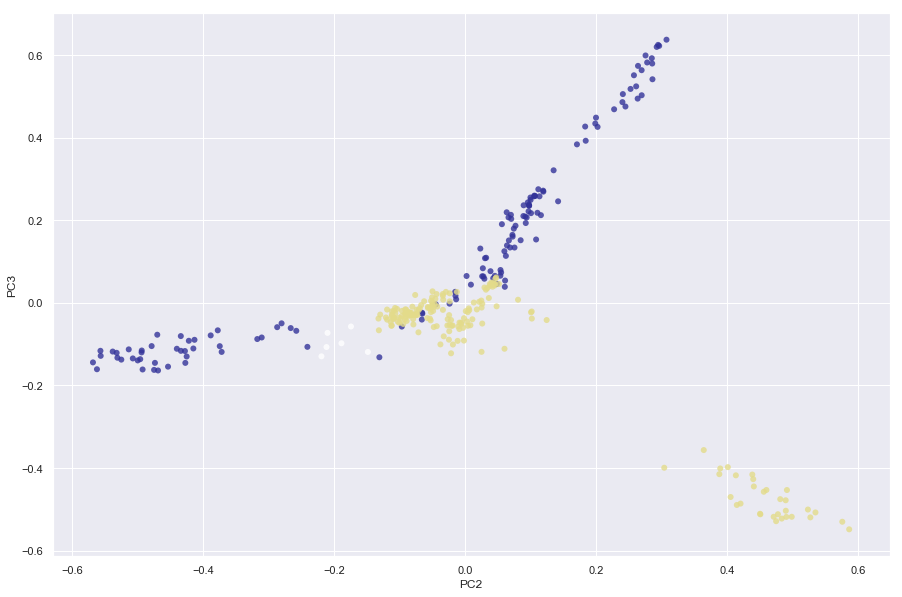

In [40]:
plt.figure(figsize=(15,10))

plt.scatter(projected[:, 1], 
            projected[:, 2],
            c=genre_ids, 
            edgecolor='none', 
            alpha=0.8,
            cmap=plt.cm.get_cmap('terrain', 10))

plt.xlabel('PC2')
plt.ylabel('PC3')

# for i, x in enumerate(projected):
#     plt.annotate(i+1, (x[1], x[2]))

## View component loadings

In [41]:
COMPS = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_))
COMPS.columns = ["PC{}".format(i+1) for i in COMPS.columns]
COMPS.index = vocab_idx

In [42]:
vshort = vocab.loc[vocab_idx]

In [43]:
vshort = pd.concat([vshort, COMPS], axis=1)

In [44]:
vshort.head()

,term_str,n,p,port_stem,stop,df,idf,tfidf_sum,tfidf_mean,tfidf_max,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
term_id,,,,,,,,,,,,,,,,,,,,
50,able,315,0.000210,abl,0,173,0.267104,84.137721,0.262930,1.602623,-0.003449,-0.001476,-0.003096,-0.001660,0.000665,-0.001000,0.000065,-0.000600,-0.001336,0.000318
51,ablewhite,136,0.000091,ablewhit,0,20,1.204120,163.760318,0.511751,43.348319,-0.004583,0.002963,0.006531,0.016058,-0.005502,-0.001879,-0.000108,-0.001186,-0.013377,-0.016883
86,absence,135,0.000090,absenc,0,79,0.607523,82.015590,0.256299,6.682752,0.000829,0.000921,-0.003561,-0.000149,-0.000832,0.001272,-0.001885,-0.001419,-0.001562,-0.000146
174,account,314,0.000209,account,0,160,0.301030,94.523419,0.295386,3.612360,-0.001629,-0.000022,-0.003281,0.000626,0.000723,0.000508,-0.002363,-0.000284,-0.001584,0.000858
251,across,274,0.000183,across,0,133,0.381298,104.475744,0.326487,3.050387,-0.005456,-0.006789,-0.001195,-0.002727,-0.000743,0.000028,0.000084,-0.001426,-0.002255,0.001732


In [45]:
vshort.sort_values('PC1', ascending=False)[['term_str','PC1']]

,term_str,PC1
term_id,,
7989,emily,0.161804
15535,montoni,0.076519
25986,valancourt,0.068676
918,annette,0.047363
1555,aubert,0.038159
14528,madame,0.031335
3846,chateau,0.029097
5396,count,0.027848
14424,ludovico,0.026162


In [26]:
vshort.sort_values('PC2', ascending=False)[['term_str','PC2']]

,term_str,PC2
term_id,,
3590,catherine,0.114621
24400,tilney,0.057630
25026,tuppence,0.048463
13136,isabella,0.042016
24529,tommy,0.039468
13395,julius,0.022798
13207,james,0.017293
15717,mrs,0.016252
15355,miss,0.016024


In [27]:
vshort.sort_values('PC3', ascending=False)[['term_str','PC3']]

,term_str,PC3
term_id,,
25026,tuppence,0.101283
24529,tommy,0.085562
13395,julius,0.047682
9901,franklin,0.032702
21388,sergeant,0.031824
13210,jane,0.024636
19154,rachel,0.021238
2317,betteredge,0.020424
6652,diamond,0.016305
